In [1]:
# Linear Regression
#Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes

In [3]:
# load the dataset
X, y = load_diabetes(return_X_y=True)
diabetes = load_diabetes()
df_In= pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_In.insert(10, "y", y, allow_duplicates = False)
pd.DataFrame(df_In)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [4]:
# looking for zero values in the X
print((df_In[:]==0).sum())

# Checking if there is any non float value in the X
a=0
for i in X:
    for j in i:
        if not isinstance(j, float):
            a+=1
print("Number of the Values that their format is not a number is:",a)

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
y      0
dtype: int64
Number of the Values that their format is not a number is: 0


In [5]:
# looking for zero values in the y
print((y[:]==0).sum())

# Checking if there is any non float value in the X
for i in y:
    if not isinstance(i, float):
        a+=1
print("Number of the Values that are not numbers is:",a)

0
Number of the Values that are not numbers is: 0


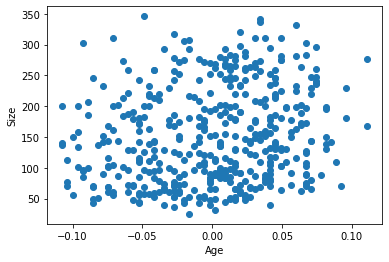

In [6]:
# Let's look at age plot for example
plt.scatter(df_In["age"],y)
plt.xlabel("Age")
plt.ylabel("Size")
plt.show()

In [7]:
def compute_cost(x, y, w, b): 
   
    m = x.shape[0] 
    
    total_cost = 0
    cost=0
    
    for i in range (m):
        f_wb_i= np.dot(w , x[i]) + b
        cost =cost+ (f_wb_i - y[i])**2
        
    total_cost = 1 / (2 * m) * cost
     

    return total_cost

In [8]:
w_in=np.zeros((1,10))               #Initial values for w
b_in=0                              # Initial value for b
total_cost= compute_cost(X, y, w_in, b_in)
print(f"Cost at w,b=0 is: {total_cost}")

Cost at w,b=0 is: [14537.24095023]


In [9]:
y=y.reshape(442,1)
def compute_gradient(x, y, w, b): 

    m,n = x.shape           
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(w, x[i]) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [10]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X, y, w_in, b_in)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [-152.13348416]
dj_dw at initial w,b: 
 [-0.688197   -0.15772705 -2.14804358 -1.61705489 -0.77659378 -0.6375217
  1.44603004 -1.57665844 -2.07270899 -1.40095661]


In [11]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
       
    
    J_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(x, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
         # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}   ")
        
    return w, b, J_history #return final w,b and J history 

In [166]:
# some gradient descent settings
iterations = 5000
alpha =2

 
'''
I ran gradient descent twice and I passed the new w and b to the gradient descent function again. In the end, it gave me these values 
with Cost= 1439. So I'm going to choose these values for initial w and b. Now I'm going to run gradient descent.
'''
w_in=np.array([-6.62575313, -236.50655697,  528.90127063,  322.06859081, -100.76918907,
   -82.22331178, -196.09877691,  109.28834698,  487.70610767,   70.14954179])
b_in=152.13348416


# run gradient descent
w_final, b_final, J_hist = gradient_descent(X, y, w_in, b_in,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")
# m,_ = x.shape
# for i in range(m):
#     print(f"prediction: {np.dot(w_final, x[i]) + b_final}, target value: {y[i]}")

predictions=np.dot(X, w_final) + b_final
data= pd.DataFrame(predictions)
data.insert(1, "actual values (y)", y, allow_duplicates = False)
data = data.rename(columns={0: 'Predicted values'})
pd.DataFrame(data)

Iteration 0: Cost [1439.1318699]   
Iteration 500: Cost [1438.76261823]   
Iteration 1000: Cost [1438.4124525]   
Iteration 1500: Cost [1438.07902354]   
Iteration 2000: Cost [1437.76065817]   
Iteration 2500: Cost [1437.45606783]   
Iteration 3000: Cost [1437.16422804]   
Iteration 3500: Cost [1436.88430297]   
Iteration 4000: Cost [1436.61559343]   
Iteration 4500: Cost [1436.35750035]   
b,w found by gradient descent: [152.13348416],[  -7.35019729 -236.88214884  526.66820344  321.91676538 -221.70367049
   22.30553573 -152.01064994  107.7182714   537.78626876   69.65665595] 


,Predicted values,actual values (y)
0,204.205697,151.0
1,69.846862,75.0
2,174.805546,141.0
3,164.033547,206.0
4,128.054383,135.0
...,...,...
437,191.971581,178.0
438,102.255050,104.0
439,123.453885,132.0
440,210.090049,220.0


In [12]:
# Scikit-learn

#Import packages


from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV





In [27]:
# SVR fit and prediction

mod = SVR()
pipe= Pipeline([
    ("model", SVR(kernel="poly", C=10000, gamma="auto", degree=10, epsilon=0.1, coef0=1))
])
pipe.get_params()


{'memory': None,
 'steps': [('model',
   SVR(C=10000, coef0=1, degree=10, gamma='auto', kernel='poly'))],
 'verbose': False,
 'model': SVR(C=10000, coef0=1, degree=10, gamma='auto', kernel='poly'),
 'model__C': 10000,
 'model__cache_size': 200,
 'model__coef0': 1,
 'model__degree': 10,
 'model__epsilon': 0.1,
 'model__gamma': 'auto',
 'model__kernel': 'poly',
 'model__max_iter': -1,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

In [33]:
mod= GridSearchCV(estimator = pipe ,
                     param_grid = {'model__degree': [2,3,4,5,6,7,8,9,10]},
                     cv=3)
y=y.reshape(442)
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034894,0.004020,0.011314,0.010968,2,{'model__degree': 2},0.480010,0.457953,0.508284,0.482082,0.020600,9
1,0.021418,0.006665,0.005561,0.007864,3,{'model__degree': 3},0.485452,0.456447,0.507516,0.483139,0.020913,7
2,0.017290,0.001074,0.003855,0.005452,4,{'model__degree': 4},0.487362,0.459858,0.505376,0.484199,0.018717,4
3,0.010265,0.003879,0.006161,0.008018,5,{'model__degree': 5},0.489932,0.460905,0.501201,0.484013,0.016975,6
4,0.013500,0.002923,0.003930,0.003791,6,{'model__degree': 6},0.491951,0.461397,0.500833,0.484727,0.016890,1
5,0.022170,0.003843,0.009416,0.005569,7,{'model__degree': 7},0.494210,0.461710,0.496377,0.484099,0.015856,5
6,0.026648,0.002831,0.004858,0.003837,8,{'model__degree': 8},0.496622,0.458804,0.493856,0.483094,0.017213,8
7,0.024409,0.004283,0.006929,0.003346,9,{'model__degree': 9},0.495370,0.459713,0.497673,0.484252,0.017377,3
8,0.034306,0.012797,0.006818,0.004821,10,{'model__degree': 10},0.494054,0.461702,0.498332,0.484696,0.016353,2


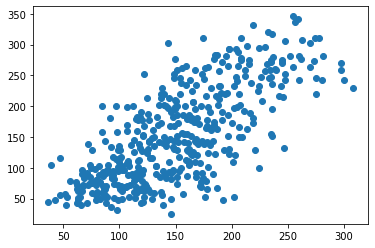

In [43]:
mod = SVR(kernel="poly", C=10000, gamma="auto", degree=6, epsilon=0.1, coef0=1)
mod.fit(X,y)
pred= mod.predict(X)
plt.scatter(pred,y)
plt.show()

In [44]:
# Predicted values
data= pd.DataFrame(pred)
data.insert(1, "actual values (y)", y, allow_duplicates = False)
data = data.rename(columns={0: 'Predicted values'})
pd.DataFrame(data)

,Predicted values,actual values (y)
0,197.083656,151.0
1,75.153520,75.0
2,168.093617,141.0
3,165.371395,206.0
4,130.812311,135.0
...,...,...
437,191.274831,178.0
438,89.684625,104.0
439,118.638616,132.0
440,206.617817,220.0


In [45]:
#Cost of SVR
Cost=0
for i in range(0,441):
    Cost+= (pred[i]-y[i])**2
print(Cost/(2*442))

1394.771651822547


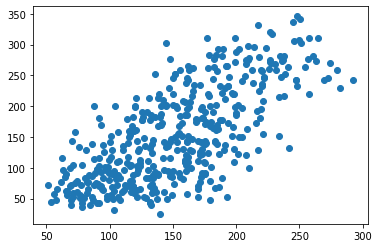

In [46]:
# SGDR fit and predict

sgdr = SGDRegressor(max_iter=200000)
sgdr.fit(X, y)
pred= sgdr.predict(X)

plt.scatter(pred , y)
plt.show()

In [47]:
# Predicted values
data= pd.DataFrame(pred)
data.insert(1, "actual values (y)", y, allow_duplicates = False)
data = data.rename(columns={0: 'Predicted values'})
pd.DataFrame(data)

,Predicted values,actual values (y)
0,196.721883,151.0
1,72.863094,75.0
2,171.853999,141.0
3,159.250544,206.0
4,127.957716,135.0
...,...,...
437,188.834319,178.0
438,117.075922,104.0
439,131.906143,132.0
440,198.328342,220.0


In [48]:
# Cost of SGDR
Cost=0
for i in range(0,441):
    Cost+= (pred[i]-y[i])**2
print(Cost/(2*442))

1463.27819651061


In [49]:
# b and W
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameter:    w: {w_norm}, b:{b_norm}")

model parameter:    w: [  14.41531805 -170.81403901  456.24921292  287.1243976   -30.31163385
  -90.54299672 -202.00275848  130.97958099  380.17544463  126.23419119], b:[152.13932823]


In [68]:
# Tensorflow


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu

In [69]:
#Tile our data to increase the training set size and reduce the number of training epochs.
Xt = np.tile(X,(1000,1))
Yt= np.tile(y,(1000))   
print(Xt.shape, Yt.shape)

(442000, 10) (442000,)


In [70]:
model = Sequential(
    [
        tf.keras.Input(shape=(10,)),
        Dense(25, activation='relu', name = 'layer1'),
        Dense(10, activation='relu', name = 'layer2'),
        Dense(1, activation='relu', name = 'layer4'),
     ]
)

In [71]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                275       
                                                                 
 layer2 (Dense)              (None, 10)                260       
                                                                 
 layer4 (Dense)              (None, 1)                 11        
                                                                 
Total params: 546
Trainable params: 546
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
)

model.fit(
    Xt,Yt,            
    epochs=2,
)

Epoch 1/2
13813/13813 [==============================] - 42s 3ms/step - loss: 2289.8418
Epoch 2/2
13813/13813 [==============================] - 41s 3ms/step - loss: 1594.1194


In [73]:
predictions = model.predict(X)
data= pd.DataFrame(predictions)
data.insert(1, "actual values (y)", y, allow_duplicates = False)
data = data.rename(columns={0: 'Predicted values'})
pd.DataFrame(data)

14/14 [==============================] - 0s 3ms/step


,Predicted values,actual values (y)
0,204.229477,151.0
1,66.957657,75.0
2,178.469284,141.0
3,228.447845,206.0
4,86.315842,135.0
...,...,...
437,188.307449,178.0
438,98.208519,104.0
439,72.153709,132.0
440,199.969101,220.0
